#### 9. This exercise involves the `Boston` housing data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

In [2]:
data = pd.read_csv("../../data/Boston.csv", index_col=0)

In [3]:
num_rows, num_cols = data.shape
print(f"There are {num_rows} rows (representing suburbs in bourbs in boston)) and {num_cols} columns in the dataset.")

description: dict[str, str] = {
    "crim": "per capita crime rate by town.",
    "zn": "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "indus": "proportion of non-retail business acres per town.",
    "chas": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).",
    "nox": "nitrogen oxides concentration (parts per 10 million).",
    "rm": "average number of rooms per dwelling.",
    "age": "proportion of owner-occupied units built prior to 1940.",
    "dis": "weighted mean of distances to five Boston employment centres.",
    "rad": "index of accessibility to radial highways.",
    "tax": "full-value property-tax rate per $10,000.",
    "ptratio": "pupil-teacher ratio by town.",
    "lstat": "lower status of the population (percent).",
    "medv": "median value of owner-occupied homes in $1000s.",
}

There are 506 rows (representing suburbs in bourbs in boston)) and 13 columns in the dataset.


In [4]:
quantitative = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "ptratio", "lstat", "medv"]

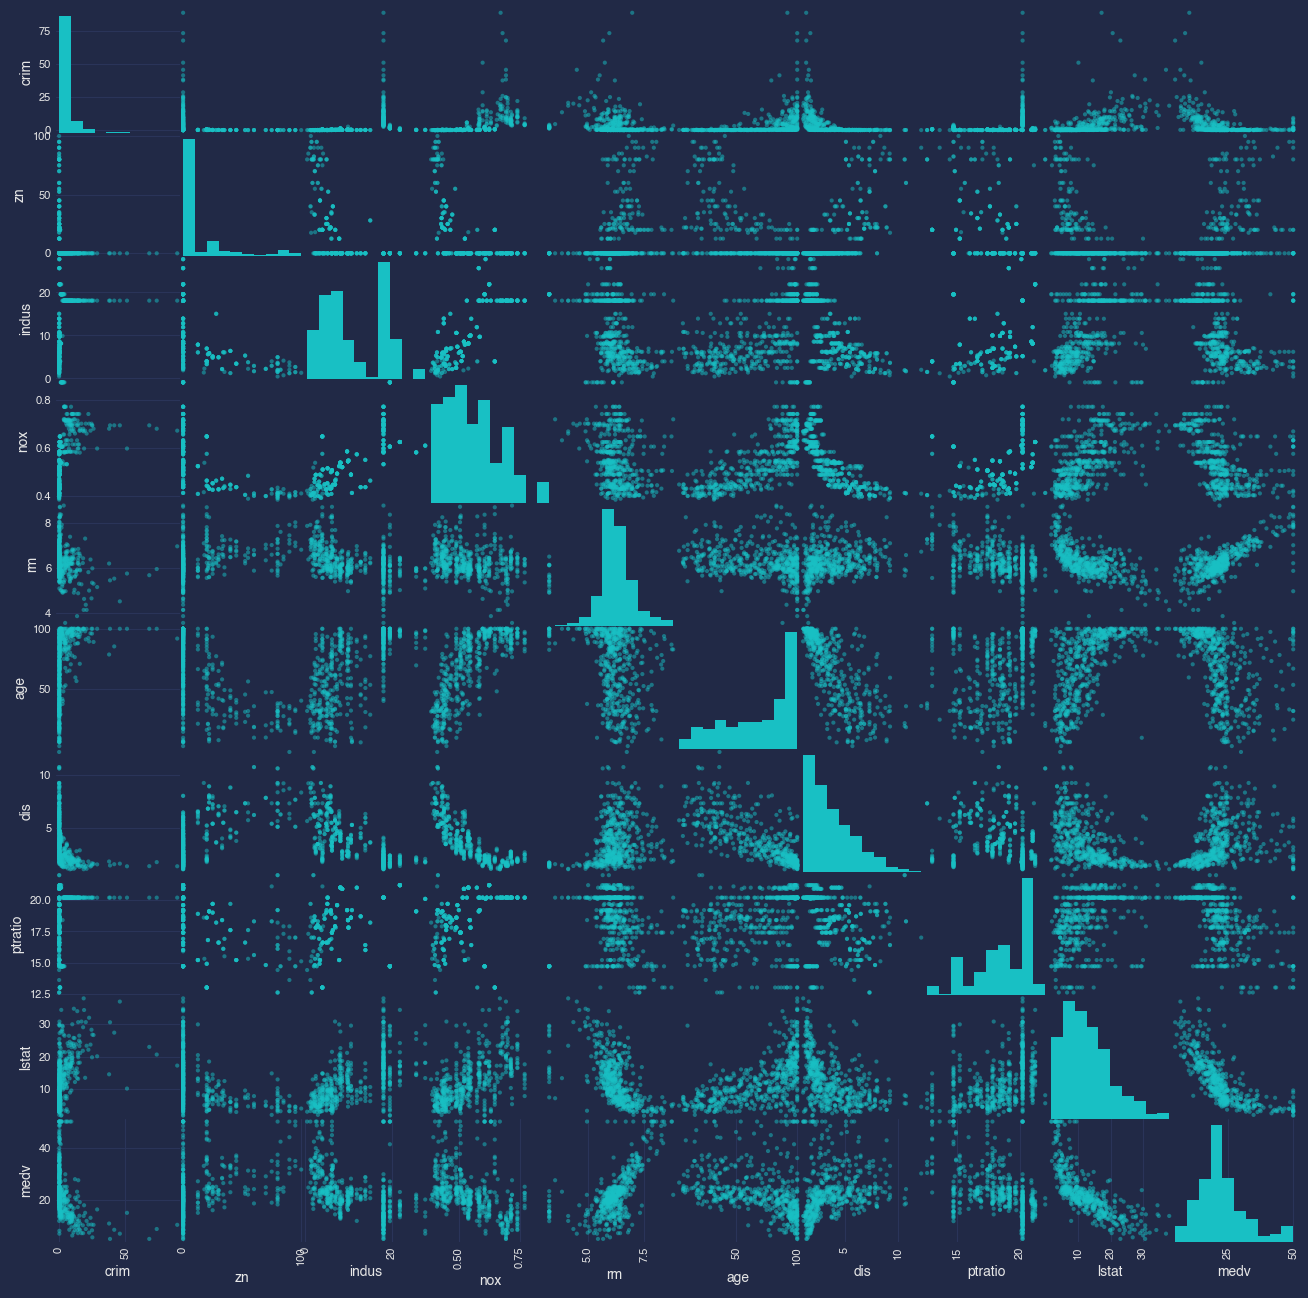

In [5]:
pd.plotting.scatter_matrix(data[quantitative], figsize=(16, 16));

Strong correlation between `nox` and `dis`, weak correlation between `nox` and `age`, positive linear relation between `rm` and `medv`, and between `lstat` and `medv`.

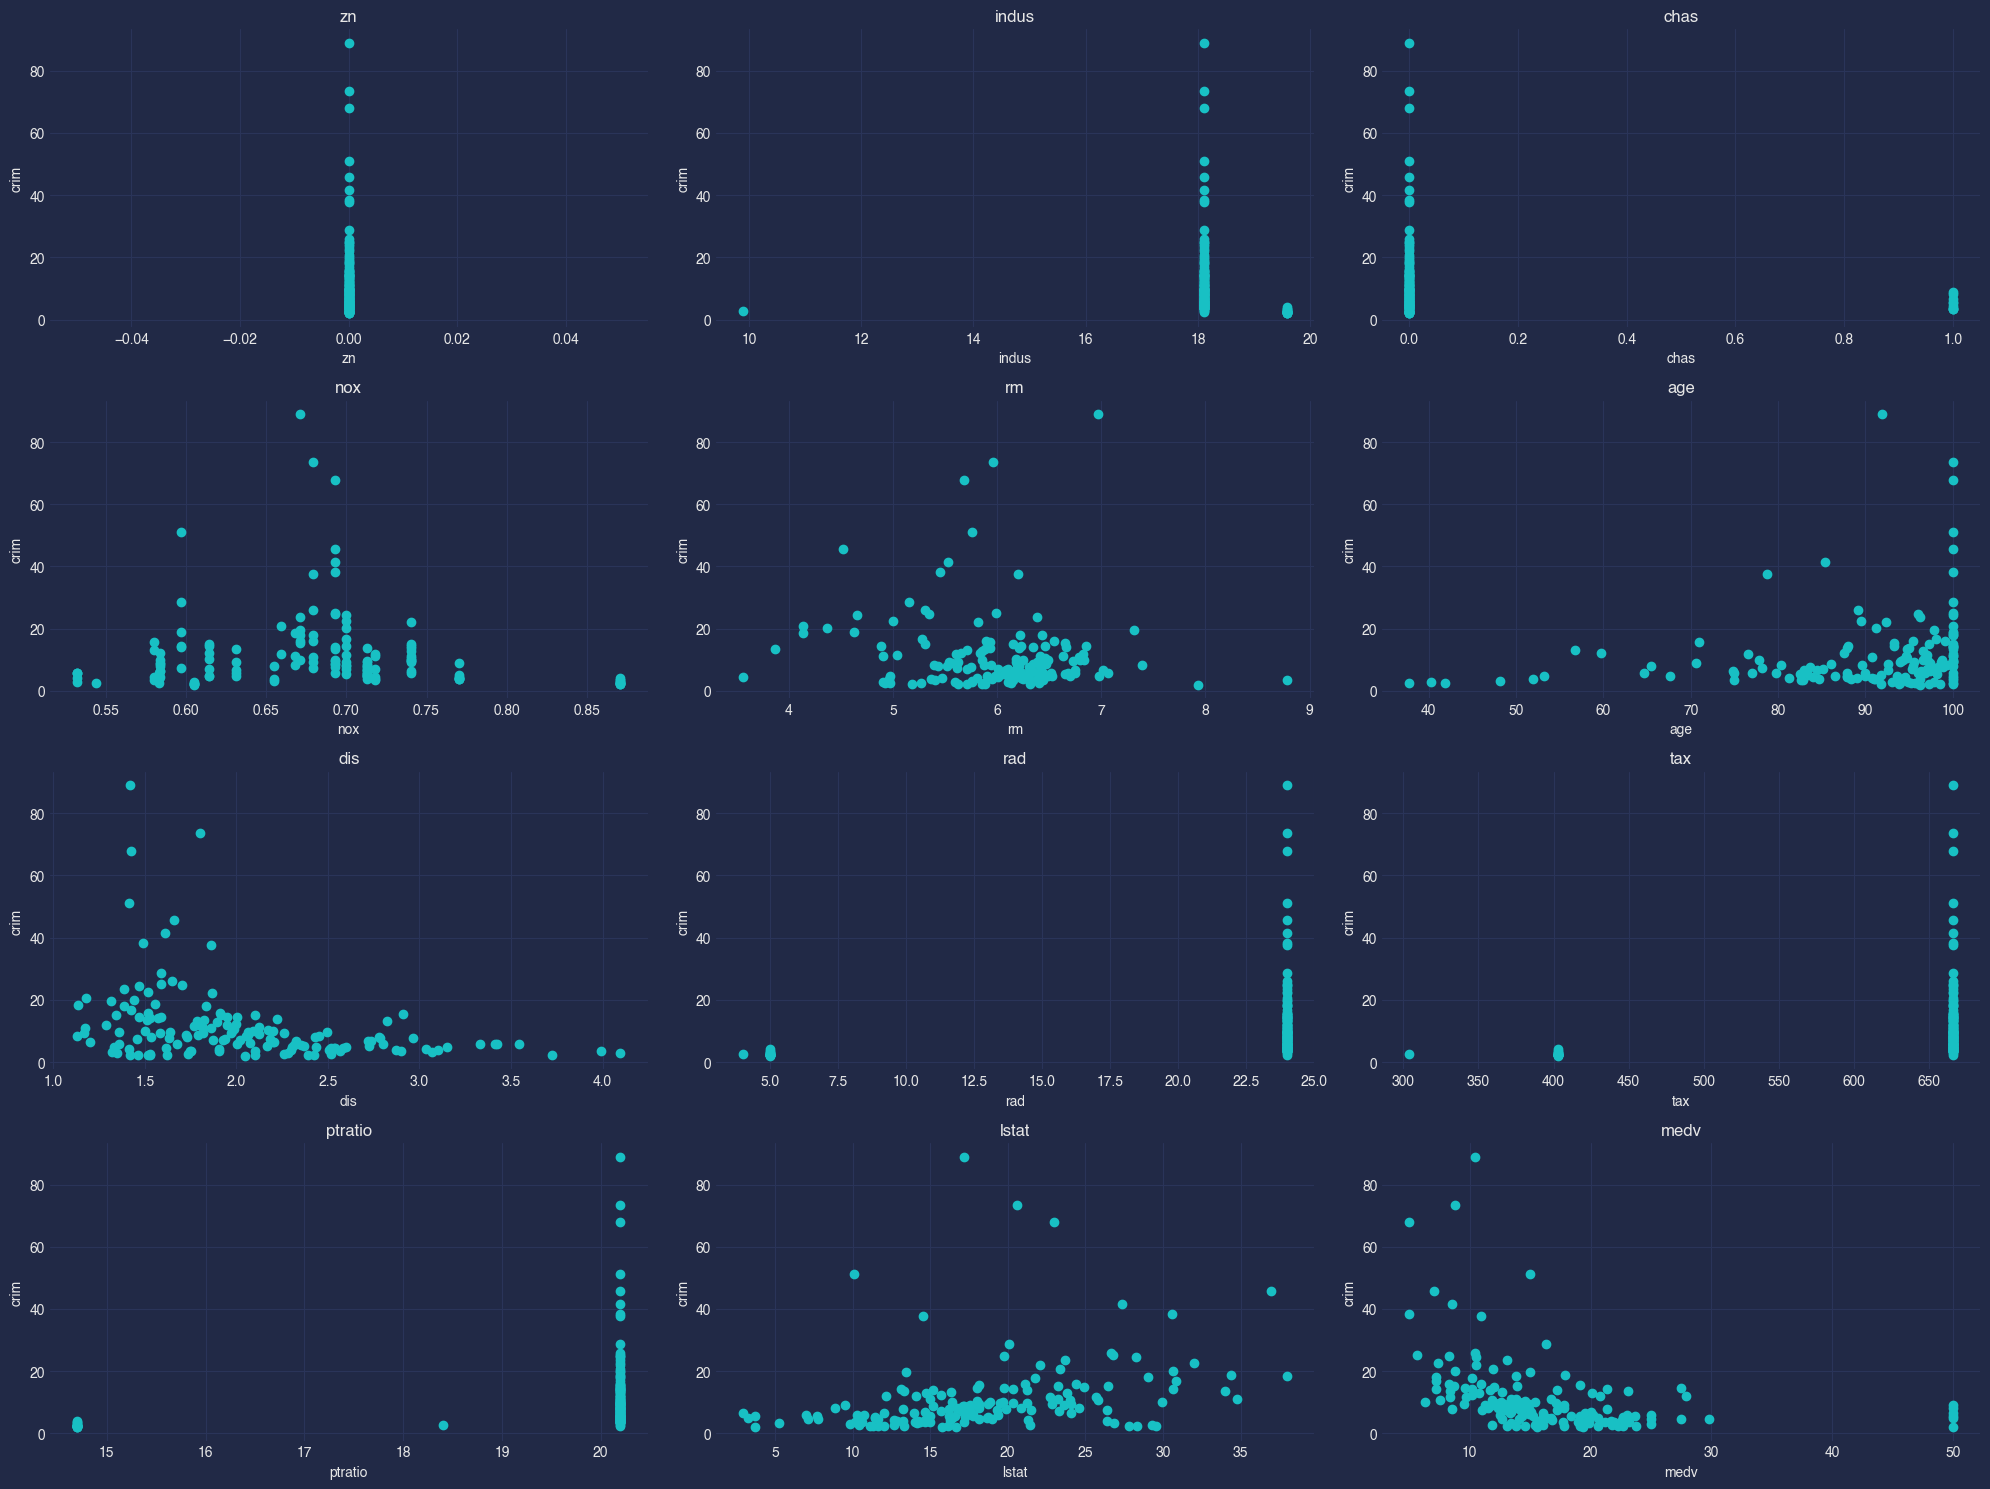

In [6]:
columns = [c for c in data.columns if c != "crim"]

plt.figure(figsize=(20, 15))

for index, col in enumerate(columns):
    plt.subplot(4, 3, index + 1) 
    _tmp = data[[col, "crim"]].sort_values(by=col)
    _tmp = _tmp[_tmp["crim"] > 2]
    plt.scatter(_tmp[col], _tmp["crim"], label=col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crim')

plt.tight_layout()
plt.show()


`dis` has a week negative correlation with `crim`. `lstat` has a positive linear correlation with `crim`, `medv` has a strong negative correlation with `crim`. Age has a positive correlation with `crim`. There seems to be a somewhat complicated correlation between `nox` and `crim`.

In [29]:
_tmp: pd.DataFrame = data.copy().describe().T
_tmp = _tmp[[c for c in _tmp.columns if c != "count"]]
_tmp = _tmp.loc[[c for c in _tmp.index if c not in ["zn", "chas"]]]
_tmp["max_to_min"] = _tmp["max"] / _tmp["min"]
_tmp

,mean,std,min,25%,50%,75%,max,max_to_min
crim,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,14078.512658
indus,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,60.304348
nox,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,2.262338
rm,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,2.465600
age,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,34.482759
dis,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,10.735216
rad,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,24.000000
tax,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,3.802139
ptratio,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000,1.746032
lstat,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700,21.947977


In [38]:
outliers: list[str] = list(_tmp[_tmp["max_to_min"] > 10.0].index)
outliers

['crim', 'indus', 'age', 'dis', 'rad', 'lstat']

In [48]:
# The ptratio between 15 and 20 seems to be stable, with a few notable outliers for a ptratio below 14 and above 21.
data.ptratio.describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

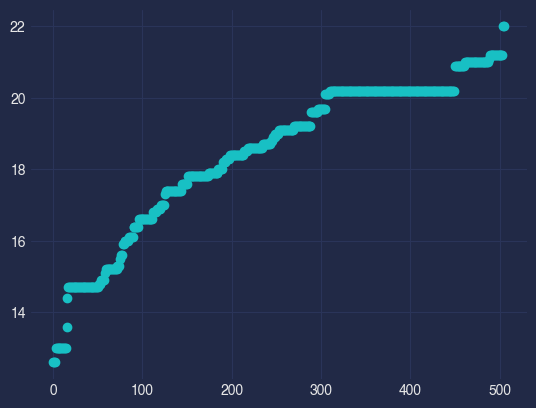

In [47]:
plt.scatter(range(len(data)), data.ptratio.sort_values())

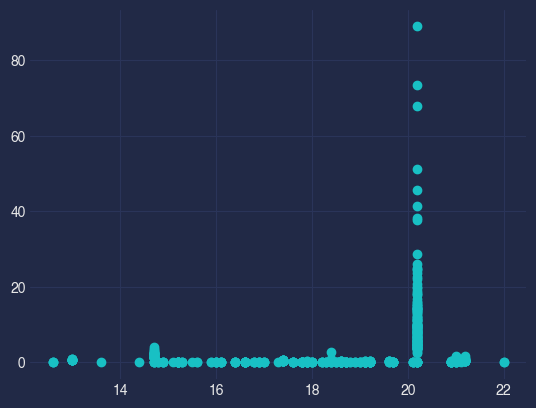

In [50]:
# The high crime areas seem to only exist with a pupil-teacher ratio between 19 and 21
_tmp = data[["ptratio", "crim"]].sort_values(by="ptratio")
plt.scatter(_tmp.ptratio, _tmp.crim)

In [61]:
_tmp[~_tmp.ptratio.between(19, 21)].crim.describe()

count    267.000000
mean       0.414242
std        0.701720
min        0.006320
25%        0.054520
50%        0.115040
75%        0.392080
max        4.097400
Name: crim, dtype: float64

In [62]:
for k, v in description.items():
    print(f"{k}: {v}")

crim: per capita crime rate by town.
zn: proportion of residential land zoned for lots over 25,000 sq.ft.
indus: proportion of non-retail business acres per town.
chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox: nitrogen oxides concentration (parts per 10 million).
rm: average number of rooms per dwelling.
age: proportion of owner-occupied units built prior to 1940.
dis: weighted mean of distances to five Boston employment centres.
rad: index of accessibility to radial highways.
tax: full-value property-tax rate per $10,000.
ptratio: pupil-teacher ratio by town.
lstat: lower status of the population (percent).
medv: median value of owner-occupied homes in $1000s.


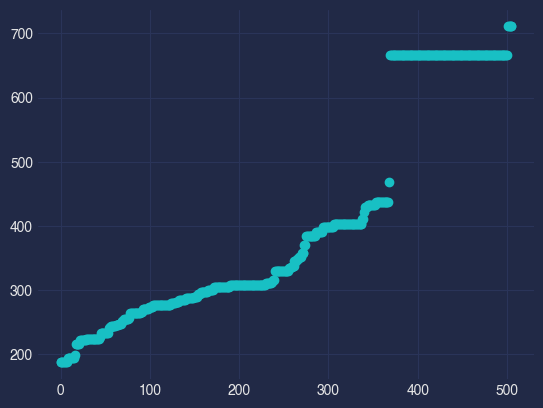

In [66]:
# The Tax rates seem to follow a somwhat linear pattersn but thn there is nothing between 500 and 650, and a constant tax rate for a lot of suburbs after that.
_tmp = data.tax.sort_values()
plt.scatter(range(len(_tmp)), _tmp)

In [90]:
_tmp_lower: pd.Series = _tmp[_tmp <= 600]
_tmp_lower.name = "tax_lower<=600"
_tmp_upper: pd.Series = _tmp[_tmp > 600]
_tmp_upper.name = "tax_upper>600"
df = pd.concat(
    [_tmp_lower.describe(), _tmp_upper.describe()],
    axis=1
)
df

,tax_lower<=600,tax_upper>600
count,369.000000,137.000000
mean,311.926829,667.642336
std,67.828288,8.469441
min,187.000000,666.000000
25%,270.000000,666.000000
50%,304.000000,666.000000
75%,384.000000,666.000000
max,469.000000,711.000000


In [98]:
print(f"Median Pupil-Teacher ratio: {data.ptratio.median():.2f}")

Median Pupil-Teacher ratio: 19.05


In [99]:
for k, v in description.items():
    print(f"{k}: {v}")

crim: per capita crime rate by town.
zn: proportion of residential land zoned for lots over 25,000 sq.ft.
indus: proportion of non-retail business acres per town.
chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox: nitrogen oxides concentration (parts per 10 million).
rm: average number of rooms per dwelling.
age: proportion of owner-occupied units built prior to 1940.
dis: weighted mean of distances to five Boston employment centres.
rad: index of accessibility to radial highways.
tax: full-value property-tax rate per $10,000.
ptratio: pupil-teacher ratio by town.
lstat: lower status of the population (percent).
medv: median value of owner-occupied homes in $1000s.


In [112]:
# Very high crime rate, max age, high tax rate, average ptratio, very high lstat, relatively high indus
# by selection it has the very words medv, very low dis
_descr = data.describe().T
_descr=_descr[[c for c in _descr.columns if c != "count"]]
_descr["MIN_CMP"] = data.iloc[data.medv.argmin()]
_descr

,mean,std,min,25%,50%,75%,max,MIN_CMP
crim,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,38.3518
zn,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,0.0000
indus,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,18.1000
chas,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.0000
nox,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.6930
rm,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,5.4530
age,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,100.0000
dis,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.4896
rad,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,24.0000
tax,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,666.0000


In [118]:
g_7, g8 = len(data[data.rm >= 7]), len(data[data.rm >= 8])
print(f"Number of suburbs with more than 7 rooms: {g_7}, number of suburbs with more than 8 rooms: {g8}")

Number of suburbs with more than 7 rooms: 64, number of suburbs with more than 8 rooms: 13


In [119]:
_large = data[data.rm >= 8]

In [142]:
A = _large.describe().T
A = A[[c for c in A.columns if c != "count"]]

B = data.describe().T
B = B[[c for c in B.columns if c != "count"]]

A_suffix = A.add_suffix('_A')
B_suffix = B.add_suffix('_B')

pd.concat([A_suffix, B_suffix], axis = 1).sort_index(axis = 1)

,25%_A,25%_B,50%_A,50%_B,75%_A,75%_B,max_A,max_B,mean_A,mean_B,min_A,min_B,std_A,std_B
crim,0.33147,0.082045,0.52014,0.25651,0.57834,3.677083,3.47428,88.9762,0.718795,3.613524,0.02009,0.00632,0.901640,8.601545
zn,0.00000,0.000000,0.00000,0.00000,20.00000,12.500000,95.00000,100.0000,13.615385,11.363636,0.00000,0.00000,26.298094,23.322453
indus,3.97000,5.190000,6.20000,9.69000,6.20000,18.100000,19.58000,27.7400,7.078462,11.136779,2.68000,0.46000,5.392767,6.860353
chas,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,1.00000,1.0000,0.153846,0.069170,0.00000,0.00000,0.375534,0.253994
nox,0.50400,0.449000,0.50700,0.53800,0.60500,0.624000,0.71800,0.8710,0.539238,0.554695,0.41610,0.38500,0.092352,0.115878
rm,8.24700,5.885500,8.29700,6.20850,8.39800,6.623500,8.78000,8.7800,8.348538,6.284634,8.03400,3.56100,0.251261,0.702617
age,70.40000,45.025000,78.30000,77.50000,86.50000,94.075000,93.90000,100.0000,71.538462,68.574901,8.40000,2.90000,24.608723,28.148861
dis,2.28850,2.100175,2.89440,3.20745,3.65190,5.188425,8.90670,12.1265,3.430192,3.795043,1.80100,1.12960,1.883955,2.105710
rad,5.00000,4.000000,7.00000,5.00000,8.00000,24.000000,24.00000,24.0000,7.461538,9.549407,2.00000,1.00000,5.332532,8.707259
tax,264.00000,279.000000,307.00000,330.00000,307.00000,666.000000,666.00000,711.0000,325.076923,408.237154,224.00000,187.00000,110.971063,168.537116


In [144]:
# Much lower crime, somehwat higher zn, quite a bit lower indus, much higher chas, similiar nox, quite a bit lower tax, lower ptratio, significnatly lower lstat, double the medv

In [145]:
for k, v in description.items():
    print(f"{k}: {v}")

crim: per capita crime rate by town.
zn: proportion of residential land zoned for lots over 25,000 sq.ft.
indus: proportion of non-retail business acres per town.
chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox: nitrogen oxides concentration (parts per 10 million).
rm: average number of rooms per dwelling.
age: proportion of owner-occupied units built prior to 1940.
dis: weighted mean of distances to five Boston employment centres.
rad: index of accessibility to radial highways.
tax: full-value property-tax rate per $10,000.
ptratio: pupil-teacher ratio by town.
lstat: lower status of the population (percent).
medv: median value of owner-occupied homes in $1000s.
